In [2]:
# Dependencies
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
from scipy import stats
from pathlib import Path
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")

# File to Load 
total_data_to_load = Path("Resources/clean_data.csv")

# Read data and store into Pandas DataFrames
total_data_df = pd.read_csv(total_data_to_load)
total_data_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


Data clean, plot the horizontal bar graph and line graph

In [3]:

# Define variables for data of total transactions
clean_total_df = total_data_df[['amt']]
clean_total_df.head()


,amt
0,2.86
1,29.84
2,41.28
3,60.05
4,3.19


In [4]:
# Establish the bins for data set of total transactions
bins = [0, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500]
labels = ["A(<50)", "B(50-100)","C(100-200)", "D(200-300)", "E(300-400)", "F(400-500)", "G(500-600)", "H(600-700)", "I(700-800)", "J(800-900)", "K(900-1000)", "L(1000-1500)"]
# Slice the data and place it into bins
pd.cut(clean_total_df["amt"], bins, labels=labels,right=False).head()


0       A(<50)
1       A(<50)
2       A(<50)
3    B(50-100)
4       A(<50)
Name: amt, dtype: category
Categories (12, object): ['A(<50)' < 'B(50-100)' < 'C(100-200)' < 'D(200-300)' ... 'I(700-800)' < 'J(800-900)' < 'K(900-1000)' < 'L(1000-1500)']

In [5]:
# Create a data frame 
clean_total_df['amt_group'] = pd.cut(clean_total_df['amt'], bins, labels=labels,right=False)
clean_total_df.head()

,amt,amt_group
0,2.86,A(<50)
1,29.84,A(<50)
2,41.28,A(<50)
3,60.05,B(50-100)
4,3.19,A(<50)


In [6]:
# Count number of transactions for each group of amount
group_total_df = clean_total_df.groupby("amt_group").count()

In [7]:
# Rename the column of count
group_total_df = group_total_df.rename(columns={'amt':'count'})
group_total_df

,count
amt_group,
A(<50),288883
B(50-100),166835
C(100-200),74648
D(200-300),13205
E(300-400),3477
F(400-500),2593
G(500-600),1912
H(600-700),842
I(700-800),632


In [8]:
# Count percentage of total transactions for each group of amount
group_total_df['percentage'] = (group_total_df['count']/group_total_df['count'].sum())*100
group_total_df

,count,percentage
amt_group,,
A(<50),288883,52.040489
B(50-100),166835,30.054295
C(100-200),74648,13.447376
D(200-300),13205,2.378799
E(300-400),3477,0.626360
F(400-500),2593,0.467113
G(500-600),1912,0.344435
H(600-700),842,0.151681
I(700-800),632,0.113851


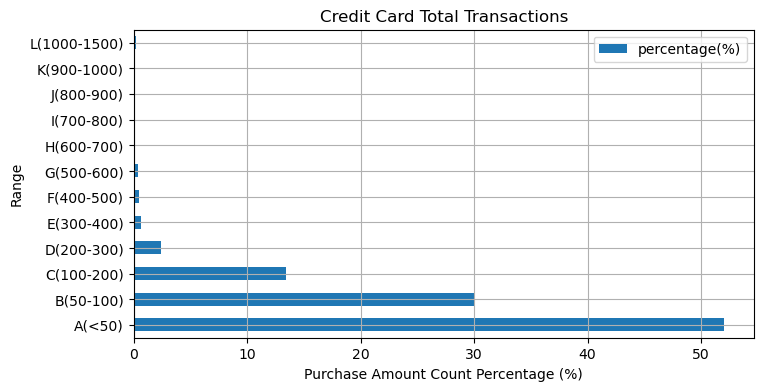

In [9]:
# Plot horizontal bar graph
# Set labels for axes
percentage = group_total_df['percentage']
df1 = pd.DataFrame({'percentage(%)': percentage})
df1.plot.barh(figsize=(8,4))

plt.xlabel('Purchase Amount Count Percentage (%)')
plt.ylabel('Range')
plt.title('Credit Card Total Transactions')
plt.grid()

plt.savefig("Fig1.png")
plt.show()

In [10]:
# Define variables for data of fraud transactions
is_fraud_df = total_data_df.loc[total_data_df["is_fraud"]==1]
is_fraud_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1685,1685,21/06/2020 22:06,3.560730e+15,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,15/09/1969,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1
1767,1767,21/06/2020 22:32,6.564460e+15,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,10/09/1958,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1
1781,1781,21/06/2020 22:37,6.564460e+15,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,10/09/1958,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1
1784,1784,21/06/2020 22:38,4.005680e+15,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,31/05/1994,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1
1857,1857,21/06/2020 23:02,3.560730e+15,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,15/09/1969,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1


In [11]:
# Extract required columns
reduced_column_df = is_fraud_df[["amt"]]
reduced_column_df.head()

,amt
1685,24.84
1767,780.52
1781,620.33
1784,1077.69
1857,842.65


In [12]:
# Reset the index 
clean_fraud_df = reduced_column_df.reset_index(drop=True)
clean_fraud_df.head()

,amt
0,24.84
1,780.52
2,620.33
3,1077.69
4,842.65


In [13]:
# Establish the bins for data set of fraud transactions
bins = [0, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500]
labels = ["A(<50)", "B(50-100)","C(100-200)", "D(200-300)", "E(300-400)", "F(400-500)", "G(500-600)", "H(600-700)", "I(700-800)", "J(800-900)", "K(900-1000)", "L(1000-1500)"]
# Slice the data and place it into bins
pd.cut(clean_fraud_df["amt"], bins, labels=labels,right=False)


0             A(<50)
1         I(700-800)
2         H(600-700)
3       L(1000-1500)
4         J(800-900)
            ...     
2140    L(1000-1500)
2141      J(800-900)
2142    L(1000-1500)
2143      D(200-300)
2144      I(700-800)
Name: amt, Length: 2145, dtype: category
Categories (12, object): ['A(<50)' < 'B(50-100)' < 'C(100-200)' < 'D(200-300)' ... 'I(700-800)' < 'J(800-900)' < 'K(900-1000)' < 'L(1000-1500)']

In [14]:
# Place the data series into a new column inside of the DataFrame
clean_fraud_df["amt_group"] = pd.cut(clean_fraud_df["amt"], bins, labels=labels,right=False)
clean_fraud_df.head()

,amt,amt_group
0,24.84,A(<50)
1,780.52,I(700-800)
2,620.33,H(600-700)
3,1077.69,L(1000-1500)
4,842.65,J(800-900)


In [15]:
# Create a GroupBy object based upon "Amount Group"
# Check how many rows in each bin
group_fraud_df = clean_fraud_df.groupby("amt_group").count()

In [16]:
# Rename the column of count
group_fraud_df = group_fraud_df.rename(columns = {'amt':'count'})
group_fraud_df

,count
amt_group,
A(<50),462
B(50-100),18
C(100-200),54
D(200-300),212
E(300-400),340
F(400-500),23
G(500-600),31
H(600-700),47
I(700-800),165


In [17]:
# Count percentage of fraud transactions for each group of amount
group_fraud_df['percentage'] = (group_fraud_df['count']/group_fraud_df['count'].sum())*100
group_fraud_df

,count,percentage
amt_group,,
A(<50),462,21.538462
B(50-100),18,0.839161
C(100-200),54,2.517483
D(200-300),212,9.883450
E(300-400),340,15.850816
F(400-500),23,1.072261
G(500-600),31,1.445221
H(600-700),47,2.191142
I(700-800),165,7.692308


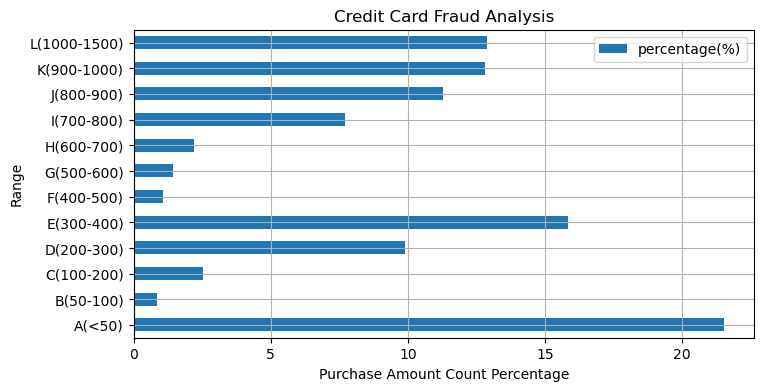

In [18]:
# Plot horizontal bar graph
# Set labels for axes
percentage = group_fraud_df['percentage']
df2 = pd.DataFrame({'percentage(%)': percentage})
df2.plot.barh(figsize=(8,4))

plt.xlabel('Purchase Amount Count Percentage')
plt.ylabel('Range')
plt.title('Credit Card Fraud Analysis')
plt.grid()

plt.savefig("Fig2.png")
plt.show()

In [19]:
# Merge two data frame
combine_df = pd.merge(group_total_df, group_fraud_df, on="amt_group")
combine_df.head()

,count_x,percentage_x,count_y,percentage_y
amt_group,,,,
A(<50),288883,52.040489,462,21.538462
B(50-100),166835,30.054295,18,0.839161
C(100-200),74648,13.447376,54,2.517483
D(200-300),13205,2.378799,212,9.883450
E(300-400),3477,0.626360,340,15.850816


In [20]:
# Reset index and convert amt_group to a column
combine_df = combine_df.reset_index()
combine_df.head()

,amt_group,count_x,percentage_x,count_y,percentage_y
0,A(<50),288883,52.040489,462,21.538462
1,B(50-100),166835,30.054295,18,0.839161
2,C(100-200),74648,13.447376,54,2.517483
3,D(200-300),13205,2.378799,212,9.883450
4,E(300-400),3477,0.626360,340,15.850816


In [21]:
# Rename the column 
combine_df = combine_df.rename(columns={'amt_group':'AmountGroup',
                                        'count_x':'CountTotal',
                                        'count_y':'CountFraud',
                                        'percentage_x':'PercentageTotal',
                                        'percentage_y':'PercentageFraud'})
combine_df

,AmountGroup,CountTotal,PercentageTotal,CountFraud,PercentageFraud
0,A(<50),288883,52.040489,462,21.538462
1,B(50-100),166835,30.054295,18,0.839161
2,C(100-200),74648,13.447376,54,2.517483
3,D(200-300),13205,2.378799,212,9.883450
4,E(300-400),3477,0.626360,340,15.850816
5,F(400-500),2593,0.467113,23,1.072261
6,G(500-600),1912,0.344435,31,1.445221
7,H(600-700),842,0.151681,47,2.191142
8,I(700-800),632,0.113851,165,7.692308
9,J(800-900),582,0.104844,242,11.282051


Comparison Analysis

To find out which group of purchase amount were affected by the fradulent transactions

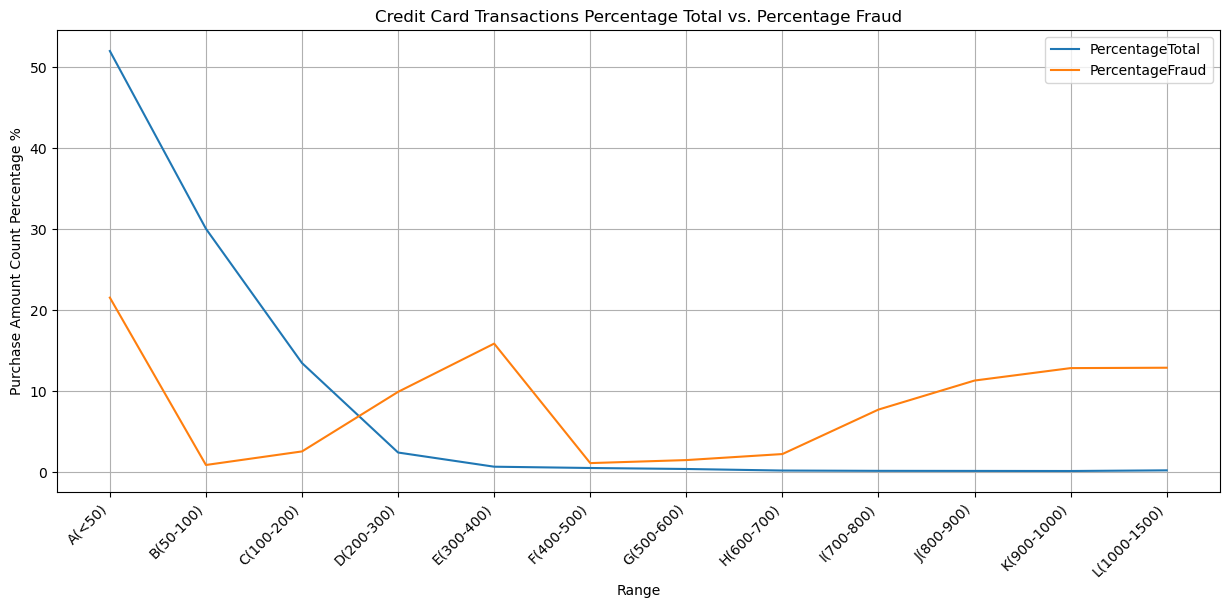

In [22]:
# Creat a data frame and plot line graph for comparison analysis 
df3 = pd.DataFrame(data=combine_df, columns =['AmountGroup', 'PercentageTotal', 'PercentageFraud'])
df3.plot(x='AmountGroup', y=['PercentageTotal', 'PercentageFraud'],
        kind="line", figsize=(15, 6))
plt.title("Credit Card Transactions Percentage Total vs. Percentage Fraud")
plt.xlabel('Range')
plt.ylabel("Purchase Amount Count Percentage %")
plt.xticks(ticks=range(len(df3['AmountGroup'])), labels=df3['AmountGroup'], rotation=45, ha='right')
plt.grid()
plt.savefig("Fig3.png")
plt.show()

Comparison conclusion:
1. The percentage of purchase amount count of total transactions decreases when the purchase amount increases especially greater than $400
2. In contrast to total transactions, the percentage of purchase amount count of fraudulent transactions increases with the the purchase amount increases especially at $300-400 and greater than $700 

Correlation and regression 
1. To test if purchase amount count percentage of total transactions negatively proportionates to the the purchase amount
2. To test if purchase amount count percentage of fraudulent transactions positively proportionates to the purchase amount

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for count percentage and the purchase amount in each group. The mean purchase amount of each group will be used for calculation
# Calculate slope, intercept, r value, p value and standard error 
# Plot linear regression equation

purchase_amount_df = pd.DataFrame({'PurchaseAmount':[25, 75, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1250]})
cor_df = purchase_amount_df.join(combine_df)

cor_df

,PurchaseAmount,AmountGroup,CountTotal,PercentageTotal,CountFraud,PercentageFraud
0,25,A(<50),288883,52.040489,462,21.538462
1,75,B(50-100),166835,30.054295,18,0.839161
2,150,C(100-200),74648,13.447376,54,2.517483
3,250,D(200-300),13205,2.378799,212,9.883450
4,350,E(300-400),3477,0.626360,340,15.850816
5,450,F(400-500),2593,0.467113,23,1.072261
6,550,G(500-600),1912,0.344435,31,1.445221
7,650,H(600-700),842,0.151681,47,2.191142
8,750,I(700-800),632,0.113851,165,7.692308
9,850,J(800-900),582,0.104844,242,11.282051


In [34]:
corr = round(st.pearsonr(cor_df['PurchaseAmount'], cor_df['PercentageTotal'])[0],2)

print(f"The correlation between purchase amount and total transaction count percentage is {corr}.")


The correlation between purchase amount and total transaction count percentage is -0.66.


In [25]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cor_df['PurchaseAmount'], cor_df['PercentageTotal'])
regress_values = cor_df['PurchaseAmount'] * slope + intercept
print(
    f"\nslope:{slope}"
    f"\nintercept:{intercept}"
    f"\nr value:{rvalue}"
    f"\np value:{pvalue}"
    f"\nstd error:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)



slope:-0.02849640456808119
intercept:23.29394573157596
r value:-0.6585493642288689
p value:0.019878339059720834
std error:0.010297454864144127
y = -0.03x + 23.29


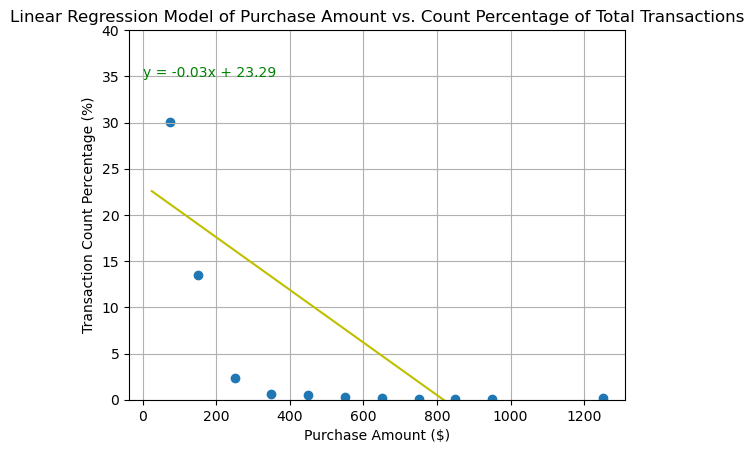

In [26]:
plt.scatter(cor_df['PurchaseAmount'], cor_df['PercentageTotal'])
plt.plot(cor_df['PurchaseAmount'],regress_values,"y-")
plt.title("Linear Regression Model of Purchase Amount vs. Count Percentage of Total Transactions")
plt.xlabel("Purchase Amount ($)")
plt.ylabel("Transaction Count Percentage (%)")
plt.annotate(line_eq, xy=(0, 35),fontsize=10,color="g")
plt.grid()
plt.ylim(0, 40)
plt.show()

In [35]:
corr = round(st.pearsonr(cor_df['PurchaseAmount'], cor_df['PercentageFraud'])[0],2)

print(f"The correlation between purchase amount and fraud transaction count percentage is {corr}.")

The correlation between purchase amount and fraud transaction count percentage is 0.1.


In [36]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cor_df['PurchaseAmount'], cor_df['PercentageFraud'])
regress_values = cor_df['PurchaseAmount'] * slope + intercept
print(
    f"\nslope:{slope}"
    f"\nintercept:{intercept}"
    f"\nr value:{rvalue}"
    f"\np value:{pvalue}"
    f"\nstd error:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


slope:0.0017816437705940457
intercept:7.39797035377146
r value:0.09918974778911649
p value:0.7590741438466775
std error:0.005652064150152492
y = 0.0x + 7.4


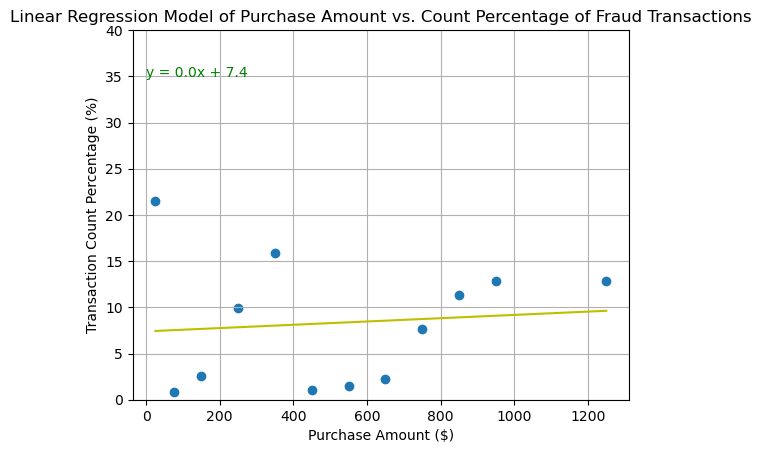

In [37]:
plt.scatter(cor_df['PurchaseAmount'], cor_df['PercentageFraud'])
plt.plot(cor_df['PurchaseAmount'],regress_values,"y-")
plt.title("Linear Regression Model of Purchase Amount vs. Count Percentage of Fraud Transactions")
plt.xlabel("Purchase Amount ($)")
plt.ylabel("Transaction Count Percentage (%)")
plt.annotate(line_eq, xy=(0, 35),fontsize=10,color="g")
plt.grid()
plt.ylim(0, 40)
plt.show()

Correlation and regression analysis conclusion:
The r-squared for both total transactions and fraud transactions are less than 0.7 indicating no correlations. 

Statistical analysis and data visualization

In [27]:
# Null hypothesis (H0): No significant count difference of purchase amount among each group
# Alternative hypothesis (Ha): Opposite to Null hypothesis

One Sample T - Tests

To compare the mean of sample to the mean of population

In [28]:
# Define sample based on the fraud dataset
sample = group_fraud_df['count'].groupby(by=['amt_group']).mean()
sample 

amt_group
A(<50)          462.0
B(50-100)        18.0
C(100-200)       54.0
D(200-300)      212.0
E(300-400)      340.0
F(400-500)       23.0
G(500-600)       31.0
H(600-700)       47.0
I(700-800)      165.0
J(800-900)      242.0
K(900-1000)     275.0
L(1000-1500)    276.0
Name: count, dtype: float64

In [29]:
# Display mean of count for each group of total dataset
population_mean = group_total_df['count'].mean()
population_mean

46259.333333333336

In [30]:
stats.ttest_1samp(sample,population_mean)

TtestResult(statistic=-1091.8933866837508, pvalue=4.7757731280193844e-29, df=11)

T test conclusion:

The p value is 4.78*e-29 <0.05 indicating significant difference between purchase amount count of fraudulent transactions and total transactions. Therefore, the null hypothesis is rejected and alternative hypothesis is accepted. 

Chi-square Test

In [31]:
# The degree of freedom is 12-1 = 11
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95
critical_value = stats.chi.ppf(q = 0.95, df = 11)
# The critical_value
critical_value

4.4356665308251575

In [32]:
stats.chisquare(combine_df['PercentageFraud'], combine_df['PercentageTotal'])

Power_divergenceResult(statistic=4798.540682856918, pvalue=0.0)

Chi-square test conclusion:

Chi-square is 4798.540682856918 > critical value 4.4356665308251575. Also, p Value = 0.0 < 0.05. Therefore, there is significant difference between transaction count percentage of fraudulent transactions and total transactions. 

Summary of Analysis: 

1. Total transaction data showed the trend that the transaction count percentage negatively proportionated to the purchase amount. In another word, the higher purchase amount especially greater than $400, the lower transaction count percentage. However, there is no strict correlations. 
2. In contrast to the total transactions, fraudulent transactions with higher purchase amount increased especially with the purchase amount of $300-400 and greater than $700. Also, no strict correlation support this assumption. 
3. The fraudulent transaction count percentage showed significant difference with total transaction count percentage which were supported by one sample t test and chi-square analysis. 